[4, 18, 2, 8, 3, 7, 12, 14, 13, 10, 6, 15, 1, 16, 0, 9, 19, 17, 5, 11]


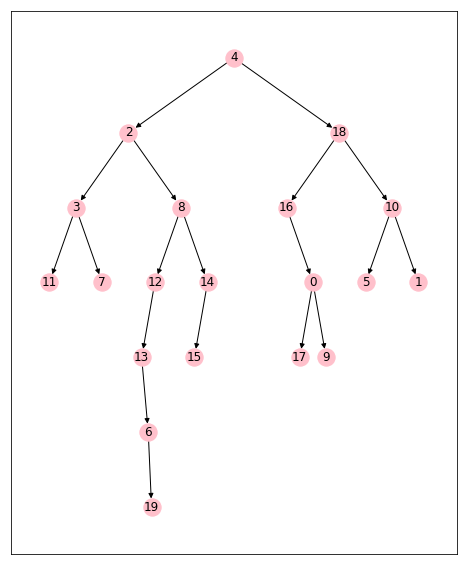

In [124]:
import random
random.seed(1)
import networkx as nx
import matplotlib.pyplot as plt

def create_graph(G, node, pos={}, x=0, y=0, layer=1):
    pos[node.value] = (x, y)
    if node.left:
        G.add_edge(node.value, node.left.value)
        l_x, l_y = x - 1 / 2 ** layer, y - 1
        l_layer = layer + 1
        create_graph(G, node.left, x=l_x, y=l_y, pos=pos, layer=l_layer)
    if node.right:
        G.add_edge(node.value, node.right.value)
        r_x, r_y = x + 1 / 2 ** layer, y - 1
        r_layer = layer + 1
        create_graph(G, node.right, x=r_x, y=r_y, pos=pos, layer=r_layer)
    return (G, pos)

def draw(node):   # 以某个节点为根画图
    graph = nx.DiGraph()
    graph, pos = create_graph(graph, node)
    fig, ax = plt.subplots(figsize=(8, 10))  # 比例可以根据树的深度适当调节
    nx.draw_networkx(graph, pos, ax=ax, node_size=300, node_color = 'pink')
    plt.show()

class node:
    def __init__(self,x):
        self.value = x
        self.left = None
        self.right = None
        

def randomTree(nums):
    def addLeaf(root,t):
        if random.randint(0,1) == 0:
            if not root.left:
                root.left = node(t)
            else:
                addLeaf(root.left,t)
        else:
            if not root.right:
                root.right = node(t)
            else:
                addLeaf(root.right,t)
    if len(nums) == 0:
        return None
    root = node(nums[0])
    
    print(nums)
    for t in nums[1:]:
        addLeaf(root,t)
    return root
N = 20
root = randomTree(random.sample(range(N),k = N))
draw(root)

In [125]:
## Non-recursive BFS with queue
from queue import Queue
def bfs(root):
    his = []
    if not root:
        return None
    q = Queue()
    q.put(root)
    while not q.empty():
        l = q.qsize()
        for _ in range(l):
            n = q.get()
            if n.left:
                q.put(n.left)
            if n.right:
                q.put(n.right)
            his.append(n.value)
    return his

bfs(root)

[4, 2, 18, 3, 8, 16, 10, 11, 7, 12, 14, 0, 5, 1, 13, 15, 17, 9, 6, 19]

In [126]:
## recursive BFS
from collections import defaultdict
def level_order_traversal(node):
    res = defaultdict(list)
    def search(node,level):
        if not node:
            return None
        res[level].append(node.value)
        
        if node.left:
            search(node.left,level + 1)
        if node.right:
            search(node.right,level + 1)
    search(node, 0)
    return res

level_order_traversal(root)

defaultdict(list,
            {0: [4],
             1: [2, 18],
             2: [3, 8, 16, 10],
             3: [11, 7, 12, 14, 0, 5, 1],
             4: [13, 15, 17, 9],
             5: [6],
             6: [19]})

In [127]:
## recursive DFS
def recursive_DFS(root, method):
    res = []
    def visit(root):
        if not root:
            return
        if method == 'pre': res.append(root.value)
        if root.left: visit(root.left)
        if method == 'in': res.append(root.value)
        if root.right: visit(root.right)
        if method == 'post': res.append(root.value)
    visit(root)
    return res

print('Preorder',recursive_DFS(root,'pre'))
print('Inorder',recursive_DFS(root,'in'))
print('Postorder',recursive_DFS(root,'post'))

Preorder [4, 2, 3, 11, 7, 8, 12, 13, 6, 19, 14, 15, 18, 16, 0, 17, 9, 10, 5, 1]
Inorder [11, 3, 7, 2, 13, 6, 19, 12, 8, 15, 14, 4, 16, 17, 0, 9, 18, 5, 10, 1]
Postorder [11, 7, 3, 19, 6, 13, 12, 15, 14, 8, 2, 17, 9, 0, 16, 5, 1, 10, 18, 4]


In [136]:
## Non-recursive DFS with stack
def Preorder_traversal(root):
    his = []
    if not root:
        return None
    stack = [root]
    while stack:
        n = stack.pop()
        his.append(n.value)
        if n.right:
            stack.append(n.right)
        if n.left:
            stack.append(n.left)
    return his

def Inorder_traversal(root):
    his = []
    if not root:
        return None
    stack = []
    n = root
    while stack or n:
        while n:
            stack.append(n)
            n = n.left
 
        
        n = stack.pop()
        his.append(n.value)
        n = n.right
    return his

def Postorder_traversal(root):
    his = []
    if not root:
        return None
    stack = []
    current = root
    while stack or current:
        while current:
            stack.append(current)
            current = current.left
            
        current = stack[-1]
        if not current.right or current.right == previous:
            his.append(current.value)
            previous = current
            current = None
            stack.pop()
        else:
            current = current.right
    
    return his

print('Preorder',Preorder_traversal(root))
print('Ineorder',Inorder_traversal(root))
print('Ineorder',Postorder_traversal(root))

Preorder [4, 2, 3, 11, 7, 8, 12, 13, 6, 19, 14, 15, 18, 16, 0, 17, 9, 10, 5, 1]
Ineorder [11, 3, 7, 2, 13, 6, 19, 12, 8, 15, 14, 4, 16, 17, 0, 9, 18, 5, 10, 1]
Ineorder [11, 7, 3, 19, 6, 13, 12, 15, 14, 8, 2, 17, 9, 0, 16, 5, 1, 10, 18, 4]
